# Session 14: Gradient Descent for Multivariate Linear Regression

In this session, we will:
1. Learn the basics of **NumPy** for numerical computing
2. Understand **gradient descent** optimization
3. Implement **multivariate linear regression** from scratch

---
## Part 1: Introduction to NumPy

NumPy is the fundamental package for numerical computing in Python. It provides:
- N-dimensional arrays (`ndarray`)
- Broadcasting for element-wise operations
- Linear algebra operations
- Mathematical functions optimized for arrays

In [2]:
import numpy as np

alias

### 1.1 Creating Arrays

In [3]:
# From Python lists
arr1 = np.array([-1, 2, 3, 4, 5], dtype=np.int8)
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}")
print(f"Dtype: {arr1.dtype}")

1D array: [-1  2  3  4  5]
Shape: (5,)
Dtype: int8


In [4]:
# 2D array (matrix)
arr2 = np.array([[1, 2, 3], 
                 [4, 5, 6]])
print(f"2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")  # (rows, columns)

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [5]:
# Common array creation functions
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
random = np.random.randn(3, 3) # 3x3 matrix of random values (normal distribution)
arange = np.arange(0, 10, 2)   # [0, 2, 4, 6, 8]
linspace = np.linspace(0, 1, 5) # 5 evenly spaced values from 0 to 1

print(f"zeros:\n{zeros}\n")
print(f"ones:\n{ones}\n")
print(f"random:\n{random}\n")
print(f"arange: {arange}")
print(f"linspace: {linspace}")

zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
[[1. 1. 1.]
 [1. 1. 1.]]

random:
[[-0.39978338  1.02476773  0.66715814]
 [-1.26693194 -0.15157924 -2.27722253]
 [-0.44708868 -0.76697811 -1.0116609 ]]

arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Array Operations and Broadcasting

NumPy operations are **element-wise** by default. Broadcasting allows operations between arrays of different shapes.

In [6]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"a + b = {a + b}")      # Element-wise addition
print(f"a * b = {a * b}")      # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")    # Element-wise power
print(f"a * 10 = {a * 10}")    # Broadcasting: scalar applied to all elements

a + b = [5 7 9]
a * b = [ 4 10 18]
a ** 2 = [1 4 9]
a * 10 = [10 20 30]


In [7]:
# Broadcasting with 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
row_vector = np.array([10, 20, 30])

"""
[[10, 20, 30],
[10, 20 ,30]]
"""

# The row vector is "broadcast" to each row of the matrix
result = matrix + row_vector
print(f"Matrix + row_vector:\n{result}")

Matrix + row_vector:
[[11 22 33]
 [14 25 36]]


### 1.3 Matrix Operations

For linear regression, we need matrix multiplication and transpose.

In [8]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

# Matrix multiplication (dot product)
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"\nnp.dot(A, B):\n{np.dot(A, B)}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

A @ B (matrix multiplication):
[[19 22]
 [43 50]]

np.dot(A, B):
[[19 22]
 [43 50]]

A.T (transpose):
[[1 3]
 [2 4]]


### 1.4 Useful Aggregation Functions

In [9]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(f"Sum all: {np.sum(arr)}")
print(f"Sum along rows (axis=1): {np.sum(arr, axis=1)}")
print(f"Sum along columns (axis=0): {np.sum(arr, axis=0)}")
print(f"Mean: {np.mean(arr)}")
print(f"Std: {np.std(arr)}")

Sum all: 21
Sum along rows (axis=1): [ 6 15]
Sum along columns (axis=0): [5 7 9]
Mean: 3.5
Std: 1.707825127659933


---
## Part 2: Linear Regression Review

### What is Linear Regression?

Linear regression models the relationship between features $X$ and target $y$ as:

$$\hat{y} = X \cdot w + b$$

Where:
- $X$ is the feature matrix of shape `(n_samples, n_features)`
- $w$ is the weight vector of shape `(n_features,)`
- $b$ is the bias (intercept) scalar
- $\hat{y}$ is the predicted values

### The Goal

Find $w$ and $b$ that minimize the **Mean Squared Error (MSE)**:

$$\mathcal{L} = MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

### Gradients for Linear Regression

For MSE loss with linear regression, the gradients are:

$$\nabla_w \mathcal{L} = \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial MSE}{\partial w} = \frac{2}{n}  (\hat{y} - y) X$$

$$\nabla_b \mathcal{L} = \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum(\hat{y} - y)$$

Let's derive this step by step:

1. $MSE = \frac{1}{n}\sum(\hat{y} - y)^2 = \frac{1}{n}\sum(Xw + b - y)^2$

2. Using chain rule: $\frac{\partial MSE}{\partial w} = \frac{2}{n} \cdot (Xw + b - y) \cdot X$

3. In matrix form: $\frac{\partial MSE}{\partial w} = \frac{2}{n} (\hat{y} - y) X$


---
## Part 3: Gradient Descent

### What is Gradient Descent?

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function.

Think of it like descending a mountain in fog - you can only feel the slope at your current position, so you take small steps in the steepest downward direction.

### The Update Rule

$$w_{new} = w_{old} - \alpha \cdot \nabla_w \mathcal{L} = w_{old} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w} $$

Where $\alpha$ is the **learning rate** - how big of a step we take.

---
## Part 4: Implementation from Scratch

Let's build our linear regression step by step.

In [10]:
# First, let's create some synthetic data
np.random.seed(42)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# Generate target with some noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0


### 4.1 Core Functions

### In-class Task

Write `predict()`, `compute_mse()`, `compute_gradients()`, which perform neccessary operations for gradient descent.

In [11]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Compute predictions for linear regression.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        w: Weight vector of shape (n_features,)
        b: Bias scalar
    
    Returns:
        Predictions of shape (n_samples,)
    """
    # Your code here
    y_hat = X @ w + b
    return y_hat

In [12]:
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute Mean Squared Error.
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
    
    Returns:
        MSE loss value
    """
    # Your code here
    # residuals = y_pred - y_true
    # residuals_square = residuals ** 2
    # squared_error = np.sum(residuals_square)
    # mse = np.mean(np.sum(residuals_square))
    MSE = np.mean((y_pred - y_true) ** 2)
    return MSE

In [13]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: True target values
        y_pred: Predicted values
    
    Returns:
        Tuple of (gradient_w, gradient_b)
    """
    # Your code here
    n = len(X)
    # X.shape[0]

    gradient_w = (2/n) * (( y_pred - y) @ X)
    gradient_b = (2/n) * np.sum( y_pred - y)

    return gradient_w, gradient_b

### Compute first gradient

In [14]:
w = np.ones((3))
b = np.array([0.0])

In [15]:
X.shape, w.shape, b.shape # Should be ((1000, 3), (3,), (1,))

((1000, 3), (3,), (1,))

In [16]:
y_pred = predict(X, w, b) # Initial predictions
print(compute_gradients(X, y, y_pred)) # Should print gradients (grad_w, grad_b)
print(y_pred.shape)
print((y_pred - y).shape)

# (array([-2.85186442,  9.29304439, -1.0522734 ]), np.float64(-10.19197986236907))
#  w1, w2, wx, bias
# increase w1 by 2.85186442
# decrease w2 by 9.29304439
# increase w3 by -1.0522734
# increaes bias by -10.19197986236907

(array([-2.85186442,  9.29304439, -1.0522734 ]), np.float64(-10.19197986236907))
(1000,)
(1000,)


Can you observe what happen?

### 4.2 Training Loop

In [17]:
def train_linear_regression(
    X: np.ndarray, 
    y: np.ndarray, 
    learning_rate: float = 0.01, 
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step = 25,
) -> tuple:
    """
    Train linear regression using gradient descent.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: Target values of shape (n_samples,)
        learning_rate: Step size for gradient descent
        n_iterations: Number of training iterations
        verbose: Whether to print progress
        log_every_n_step: Number of steps to log the result
    
    Returns:
        Tuple of (final_weights, final_bias, loss_history)
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Your code here

        # calculate y_pred (y_hat)
        y_pred = predict(X, w, b)

        # calculate Gradiant
        gradient_w, gradient_b = compute_gradients(X, y, y_pred)
        
        # calculate Gradient descent
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b

        # calculate loss
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)
        
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [18]:
# Train the model
learned_w, learned_b, losses = train_linear_regression(
    X, y, 
    learning_rate=0.01,
    n_iterations=1000
)

Iteration    0 | Loss: 45.871205
Iteration   25 | Loss: 16.066821
Iteration   50 | Loss: 5.745055
Iteration   75 | Loss: 2.166888
Iteration  100 | Loss: 0.925067
Iteration  125 | Loss: 0.493531
Iteration  150 | Loss: 0.343353
Iteration  175 | Loss: 0.291002
Iteration  200 | Loss: 0.272720
Iteration  225 | Loss: 0.266321
Iteration  250 | Loss: 0.264077
Iteration  275 | Loss: 0.263287
Iteration  300 | Loss: 0.263008
Iteration  325 | Loss: 0.262910
Iteration  350 | Loss: 0.262875
Iteration  375 | Loss: 0.262862
Iteration  400 | Loss: 0.262858
Iteration  425 | Loss: 0.262856
Iteration  450 | Loss: 0.262856
Iteration  475 | Loss: 0.262856
Iteration  500 | Loss: 0.262855
Iteration  525 | Loss: 0.262855
Iteration  550 | Loss: 0.262855
Iteration  575 | Loss: 0.262855
Iteration  600 | Loss: 0.262855
Iteration  625 | Loss: 0.262855
Iteration  650 | Loss: 0.262855
Iteration  675 | Loss: 0.262855
Iteration  700 | Loss: 0.262855
Iteration  725 | Loss: 0.262855
Iteration  750 | Loss: 0.262855
Iterat

In [19]:
# Compare learned parameters with true parameters
print("\n=== Results ===")
print(f"True weights:    {true_weights}")
print(f"Learned weights: {learned_w}")
print(f"\nTrue bias:    {true_bias}")
print(f"Learned bias: {learned_b:.4f}")


=== Results ===
True weights:    [ 2.  -3.5  1.5]
Learned weights: [ 2.00851256 -3.51329578  1.48094932]

True bias:    5.0
Learned bias: 4.9910


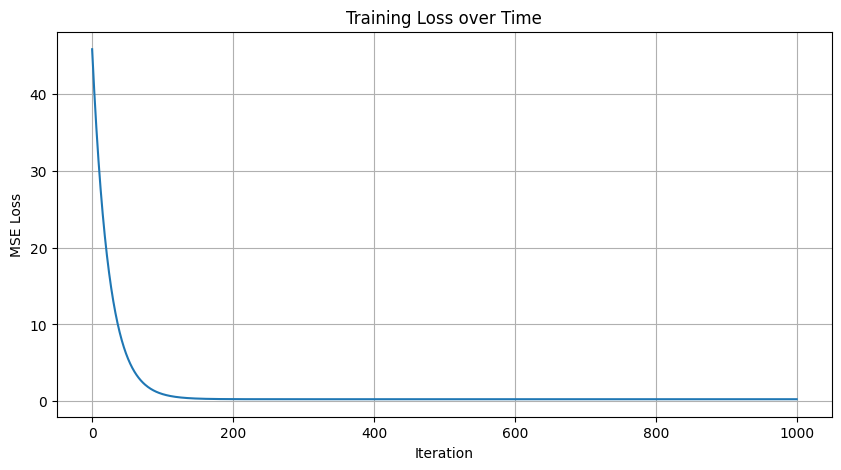

In [20]:
# Visualize the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

---
## Part 5: Feature Scaling

Gradient descent works much better when features are on similar scales. Let's see why and how to fix it.

This is statistical way to standarize any sameple of feature $i$ to a normal distribution:
$$X_i = \frac{x_i-\mu_i}{\sigma_i}$$
where $X_i$ is the column vector of raw data feature $i$

In [21]:
# Create data with very different scales
np.random.seed(42)
X_unscaled = np.column_stack([
    np.random.randn(500) * 1000,      # Feature 1: scale ~1000
    np.random.randn(500) * 0.01,     # Feature 2: scale ~0.001
    np.random.randn(500)              # Feature 3: scale ~1
])
y_unscaled = X_unscaled @ np.array([0.001, 1000, 1]) + 5 + np.random.randn(500) * 0.5

print(f"Feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_unscaled[:, i].min():.2f}, {X_unscaled[:, i].max():.2f}]")

Feature ranges:
  Feature 1: [-3241.27, 3852.73]
  Feature 2: [-0.03, 0.03]
  Feature 3: [-2.90, 2.60]


In [22]:
# This will likely fail or converge very slowly!
try:
    w_bad, b_bad, losses_bad = train_linear_regression(
        X_unscaled, y_unscaled, learning_rate=0.01, n_iterations=100
    )
except:
    print("Training failed due to numerical instability!")

# gradiant explosion

Iteration    0 | Loss: 174.326927
Iteration   25 | Loss: 724494606676516422442016637055483189694637820564437181275228395405022876141911824590980302689506177433831322557604938179985782937603636927135373074469814518876119500194330811983613999415516235592007507790794112106496.000000
Iteration   50 | Loss: inf
Iteration   75 | Loss: nan
Iteration   99 | Loss: nan


C:\Users\Minnie\AppData\Local\Temp\ipykernel_6696\3713880099.py:17: RuntimeWarning: overflow encountered in square
  MSE = np.mean((y_pred - y_true) ** 2)
C:\Users\Minnie\AppData\Local\Temp\ipykernel_6696\3727382653.py:17: RuntimeWarning: overflow encountered in matmul
  gradient_w = (2/n) * (( y_pred - y) @ X)
C:\Users\Minnie\AppData\Local\Temp\ipykernel_6696\3727382653.py:17: RuntimeWarning: invalid value encountered in matmul
  gradient_w = (2/n) * (( y_pred - y) @ X)
c:\Users\Minnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Minnie\AppData\Local\Temp\ipykernel_6696\919971314.py:41: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * gradient_w


### Task: Implement standardize function

In [23]:
# Solution: Standardization (Z-score normalization)
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.
    
    Returns:
        Tuple of (X_standardized, mean, std)
    """
    # Your code here
    mean_each_column = np.mean(X, axis = 0)
    sd_each_column = np.std(X, axis = 0)
    X_scaled = (X - mean_each_column) / sd_each_column
    return X_scaled, mean_each_column, sd_each_column



In [24]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.1, n_iterations=500
)

Scaled feature ranges:
  Feature 1: [-3.31, 3.92]
  Feature 2: [-2.79, 2.66]
  Feature 3: [-2.98, 2.47]
Iteration    0 | Loss: 127.514699
Iteration   25 | Loss: 0.243240
Iteration   50 | Loss: 0.240479
Iteration   75 | Loss: 0.240479
Iteration  100 | Loss: 0.240479
Iteration  125 | Loss: 0.240479
Iteration  150 | Loss: 0.240479
Iteration  175 | Loss: 0.240479
Iteration  200 | Loss: 0.240479
Iteration  225 | Loss: 0.240479
Iteration  250 | Loss: 0.240479
Iteration  275 | Loss: 0.240479
Iteration  300 | Loss: 0.240479
Iteration  325 | Loss: 0.240479
Iteration  350 | Loss: 0.240479
Iteration  375 | Loss: 0.240479
Iteration  400 | Loss: 0.240479
Iteration  425 | Loss: 0.240479
Iteration  450 | Loss: 0.240479
Iteration  475 | Loss: 0.240479
Iteration  499 | Loss: 0.240479


---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [25]:
import numpy as np

def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    """
    Train linear regression using mini-batch gradient descent.
    
    Hints:
    - Use np.random.choice to select random indices
    - Compute gradients using only the selected samples
    """
    n_samples, n_features = X.shape
    
    # Initialize parameters randomly
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Your code here
        # Sample random mini-batch indices
        batch_idx = np.random.choice(n_samples, batch_size, replace=False)
        X_b = X[batch_idx]
        y_b = y[batch_idx]
        
        # y_pred for mini-batch
        y_pred = predict(X_b, w, b)
        
        # Compute gradients (using only the batch)
        gradient_w, gradient_b = compute_gradients(X_b, y_b, y_pred)
        
        # Gradient descent
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b

        # Compute loss
        full_pred = predict(X, w, b)
        loss = compute_mse(y, full_pred)
        loss_history.append(loss)
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [26]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.01,
    n_iterations=200,
    log_every_n_step=50
)

Iteration    0 | Loss: 43.812582
Iteration   50 | Loss: 5.575376
Iteration  100 | Loss: 0.904171
Iteration  150 | Loss: 0.339837
Iteration  199 | Loss: 0.274464


## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [27]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential',  # 'step', 'exponential', or 'inverse'
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
    verbose: bool = True,
    log_every_n_step: int = 100
) -> tuple:
    """
    Train with learning rate scheduling.
    
    Implement at least one scheduling strategy.
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    learning_rate = initial_lr
    loss_history = []
    for i in range(n_iterations):
        # Your code here

        # Compute predictions
        y_pred = predict(X, w, b)

        # Compute gradients
        gradient_w, gradient_b = compute_gradients(X, y, y_pred)

        # learning rate
        if schedule == 'step':
            # Reduce by 10% every 100 iterations
            learning_rate = initial_lr * (0.9 ** (i // 100))
        elif schedule == 'exponential':
            learning_rate = initial_lr * np.exp(-decay_constant * i)
        elif schedule == 'inverse':
            learning_rate = initial_lr / (1 + decay_constant * i)

        # gradient descent
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b

        # Compute loss
        loss = compute_mse(y, predict(X, w, b))
        loss_history.append(loss)

        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f} | LR: {learning_rate:.6f}")

    
    return w, b, loss_history

In [28]:
# Test them all:
print("Step decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=500,
    decay_constant=0.0001
)

print("Exponential decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=500,
    decay_constant=0.0001
)

print("Inverse time decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=500,
    decay_constant=0.0001
)

Step decay:
Iteration    0 | Loss: 43.879644 | LR: 0.010000
Iteration  100 | Loss: 0.899516 | LR: 0.009000
Iteration  200 | Loss: 0.277408 | LR: 0.008100
Iteration  300 | Loss: 0.263356 | LR: 0.007290
Iteration  400 | Loss: 0.262880 | LR: 0.006561
Iteration  499 | Loss: 0.262857 | LR: 0.006561
Exponential decay:
Iteration    0 | Loss: 43.936281 | LR: 0.010000
Iteration  100 | Loss: 0.910534 | LR: 0.009900
Iteration  200 | Loss: 0.273125 | LR: 0.009802
Iteration  300 | Loss: 0.263032 | LR: 0.009704
Iteration  400 | Loss: 0.262859 | LR: 0.009608
Iteration  499 | Loss: 0.262855 | LR: 0.009513
Inverse time decay:
Iteration    0 | Loss: 43.804896 | LR: 0.010000
Iteration  100 | Loss: 0.909002 | LR: 0.009901
Iteration  200 | Loss: 0.273109 | LR: 0.009804
Iteration  300 | Loss: 0.263032 | LR: 0.009709
Iteration  400 | Loss: 0.262859 | LR: 0.009615
Iteration  499 | Loss: 0.262855 | LR: 0.009525


## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [29]:
def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    """
    Compute Ridge regression loss (MSE + L2 regularization).
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
    
    Returns:
        Ridge loss value
    """
    # Your code here
    mse_loss = np.mean((y_true - y_pred) ** 2)
    l2_loss = reg_lambda * np.sum(w ** 2)
    return mse_loss + l2_loss

def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    """
    Compute gradients for Ridge regression.
    
    Args:
        X: Feature matrix
        y: True target values
        y_pred: Predicted values
        w: Weight vector
        reg_lambda: Regularization strength
        """
    # Your code here
    n_samples = X.shape[0]
    
    # Gradient of MSE
    gradient_w = (2 / n_samples) * X.T @ (y_pred - y)
    gradient_b = (2 / n_samples) * np.sum(y_pred - y)
    
    # Add L2 regularization to weights gradient
    gradient_w += 2 * reg_lambda * w
    
    return gradient_w, gradient_b

def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,  # Regularization strength
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 50
) -> tuple:
    """
    Train linear regression with L2 regularization.
    
    Hints:
    - Modify the loss calculation to include regularization term
    - Modify the gradient calculation for weights
    - Note: We typically don't regularize the bias term
    """
    # Your code here
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []

    for i in range(n_iterations):
        y_pred = predict(X, w, b)
        gradient_w, gradient_b = calculate_ridge_gradients(X, y, y_pred, w, reg_lambda)
        
        # Gradient descent update
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b

        # Compute loss
        loss = calculate_ridge_loss(y, y_pred, w, reg_lambda)
        loss_history.append(loss)
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history


In [30]:
_, _, _ =train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

Iteration    0 | Loss: 45.827522
Iteration   50 | Loss: 6.861542
Iteration  100 | Loss: 2.515523
Iteration  150 | Loss: 2.018332
Iteration  200 | Loss: 1.959484
Iteration  250 | Loss: 1.952172
Iteration  300 | Loss: 1.951195
Iteration  350 | Loss: 1.951050
Iteration  400 | Loss: 1.951026
Iteration  450 | Loss: 1.951021
Iteration  499 | Loss: 1.951020


## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.

In [31]:
import numpy as np

def train_sgd(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 50
) -> tuple:
    """
    Train linear regression using Stochastic Gradient Descent (batch_size=1)
    """
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []

    for i in range(n_iterations):
        # Loop over each sample
        for j in range(n_samples):
            x_j = X[j:j+1]  # shape (1, n_features)
            y_j = y[j:j+1]  # shape (1,)

            # Prediction
            y_pred_j = predict(x_j, w, b)

            # Gradients
            gradient_w, gradient_b = compute_gradients(x_j, y_j, y_pred_j)

            # Update weights
            w = w - learning_rate * gradient_w
            b = b - learning_rate * gradient_b

        # Compute loss on full dataset
        full_pred = predict(X, w, b)
        loss = compute_mse(y, full_pred)
        loss_history.append(loss)

        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")

    return w, b, loss_history

Iteration    0 | Loss: 45.815642
Iteration   25 | Loss: 16.047932
Iteration   50 | Loss: 5.738670
Iteration   75 | Loss: 2.164746
Iteration   99 | Loss: 0.952878
Iteration    0 | Loss: 43.837876
Iteration   20 | Loss: 18.923734
Iteration   40 | Loss: 8.626195
Iteration   60 | Loss: 3.793672
Iteration   80 | Loss: 1.769067
Iteration   99 | Loss: 0.952794
Iteration    0 | Loss: 0.288779
Iteration   50 | Loss: 0.288779
Iteration   99 | Loss: 0.288779


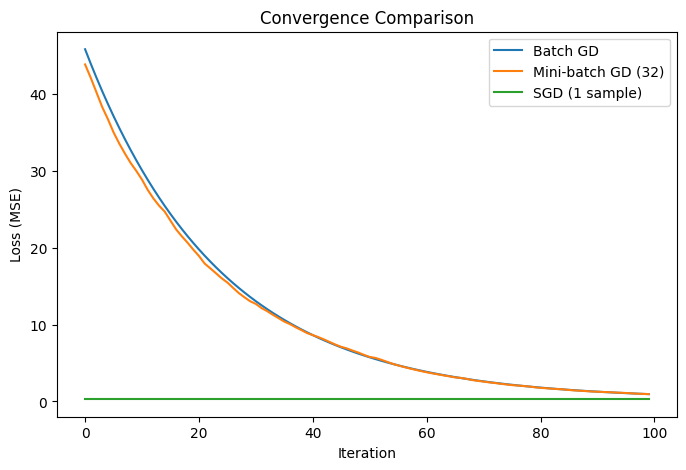

In [35]:
# Your code here
# Train all three methods
_, _, loss_batch = train_linear_regression(X, y, learning_rate=0.01, n_iterations=100)
_, _, loss_minibatch = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=100)
_, _, loss_sgd = train_sgd(X, y, learning_rate=0.01, n_iterations=100)

# Plot the losses
plt.figure(figsize=(8,5))
plt.plot(loss_batch, label='Batch GD')
plt.plot(loss_minibatch, label='Mini-batch GD (32)')
plt.plot(loss_sgd, label='SGD (1 sample)')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Convergence Comparison')
plt.legend()
plt.show()